In [1]:
#FFT Script

import pandas as pd
import numpy as np
from numpy.fft import fft, ifft, rfft
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#import two minute ULF window and apply FFT

#relevant timestamp: April 23, 2001, between 05:16 – 05:18
#file from previous day includes this. C2

cluster_ULF_csv = '/Users/apx059/Documents/1_Yr_Data/48_Weeks_CSVs/March-April/2001-04-22 22:44:00.040000C2.csv'

ULF_df = pd.read_csv(cluster_ULF_csv)

ULF_df['datetime'] = pd.to_datetime(ULF_df['datetime'])
ULF_df = ULF_df.set_index('datetime')

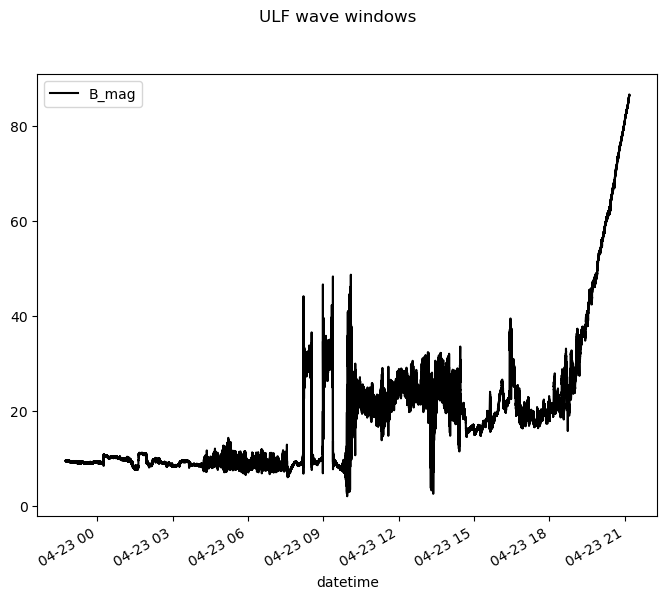

In [3]:
fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('ULF wave windows')

ULF_df['B_mag'].plot(color="black")
plt.legend()

In [4]:
#mask to just relevant times
time_start_1min = pd.to_datetime('2001-04-23 05:16:30')
time_end_1min = pd.to_datetime('2001-04-23 05:17:30')

time_start_2mins = pd.to_datetime('2001-04-23 05:16:00')
time_end_2mins = pd.to_datetime('2001-04-23 05:18:00')

time_start_4mins = pd.to_datetime('2001-04-23 05:15:00')
time_end_4mins = pd.to_datetime('2001-04-23 05:19:00')

time_start_10mins = pd.to_datetime('2001-04-23 05:12:00')
time_end_10mins = pd.to_datetime('2001-04-23 05:22:00')

ULF_df_1min = ULF_df.loc[((ULF_df.index >= time_start_1min) & (ULF_df.index < time_end_1min))]
ULF_df_2mins = ULF_df.loc[((ULF_df.index >= time_start_2mins) & (ULF_df.index < time_end_2mins))]
ULF_df_4mins = ULF_df.loc[((ULF_df.index >= time_start_4mins) & (ULF_df.index < time_end_4mins))]
ULF_df_10mins = ULF_df.loc[((ULF_df.index >= time_start_10mins) & (ULF_df.index < time_end_10mins))]

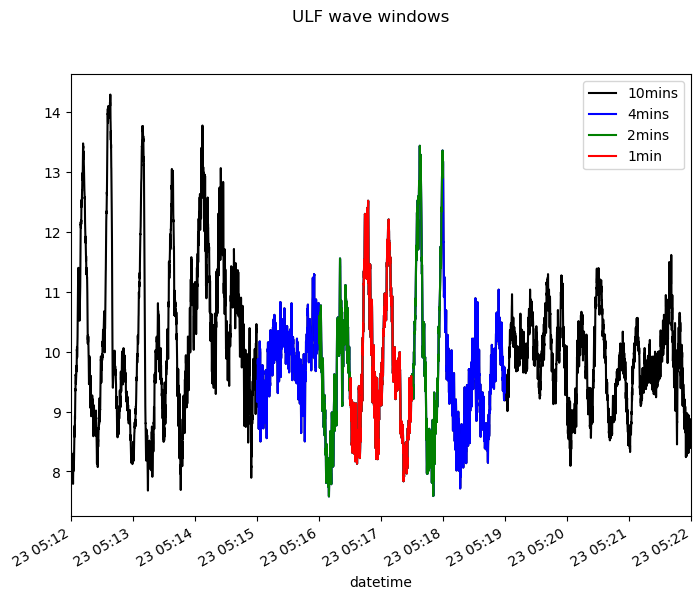

In [5]:
fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('ULF wave windows')

ULF_df_10mins['B_mag'].plot(color="black", label='10mins')
ULF_df_4mins['B_mag'].plot(color="blue", label='4mins')
ULF_df_2mins['B_mag'].plot(color="green", label='2mins')
ULF_df_1min['B_mag'].plot(color="red", label='1min')
plt.xlim(time_start_10mins, time_end_10mins)
plt.legend()

In [6]:
#FFT 10 mins
x_10 = ULF_df_10mins['B_mag'].to_numpy()
# sampling rate
sr = 22

X_10 = rfft(x_10)
N_10 = len(X_10)
n_10 = np.arange(N_10)
T_10 = N_10/sr
t_10 = ULF_df_10mins.index.to_numpy()
freq_10 = n_10/T_10
power_10 = np.abs(X_10)**2

#FFT 4 mins
x_4 = ULF_df_4mins['B_mag'].to_numpy()
# sampling rate
sr = 22

X_4 = rfft(x_4)
N_4 = len(X_4)
n_4 = np.arange(N_4)
T_4 = N_4/sr
t_4 = ULF_df_4mins.index.to_numpy()
freq_4 = n_4/T_4
power_4 = np.abs(X_4)**2

#FFT 2 mins
x_2 = ULF_df_2mins['B_mag'].to_numpy()
# sampling rate
sr = 22

X_2 = rfft(x_2)
N_2 = len(X_2)
n_2 = np.arange(N_2)
T_2 = N_2/sr
t_2 = ULF_df_2mins.index.to_numpy()
freq_2 = n_2/T_2
power_2 = np.abs(X_2)**2

#FFT 1 min
x_1 = ULF_df_1min['B_mag'].to_numpy()
# sampling rate
sr = 22

X_1 = rfft(x_1)
N_1 = len(X_1)
n_1 = np.arange(N_1)
T_1 = N_1/sr
t_1 = ULF_df_1min.index.to_numpy()
freq_1 = n_1/T_1
power_1 = np.abs(X_1)**2

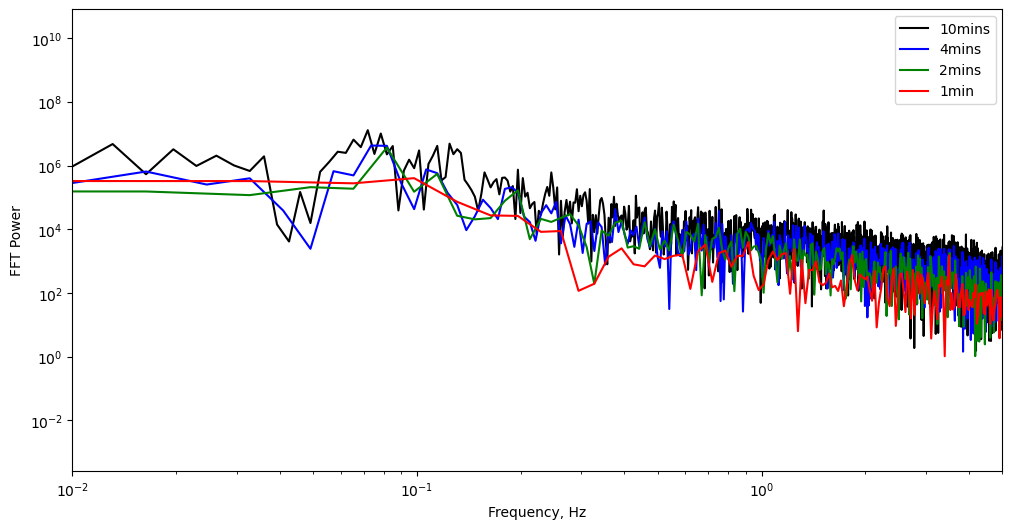

In [8]:

plt.figure(figsize = (12, 6))
plt.subplot(111)

plt.plot(freq_10, power_10, color="black", label='10mins')
plt.plot(freq_4, power_4, color="blue", label='4mins')
plt.plot(freq_2, power_2, color="green", label='2mins')
plt.plot(freq_1, power_1, color="red", label='1min')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(111)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
#plt.xlabel('Period (s)')
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlabel('Frequency, Hz')
#plt.xlim(0, 70)

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()